In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

df = pd.read_csv("diabetes.csv")

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#Rename target variable Outcome to target
df.rename(columns={'Outcome': 'target'}, inplace = True)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


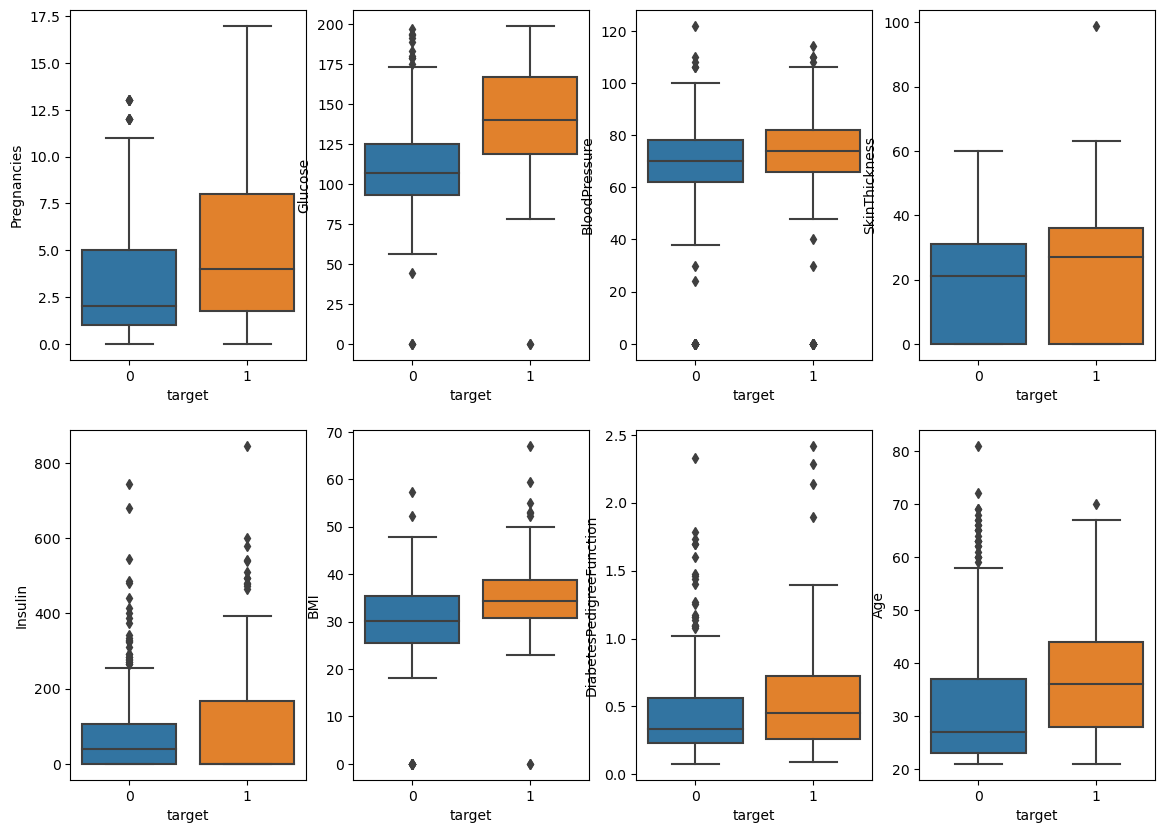

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
num_list=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
fig=plt.figure(figsize=(14, 10))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,4,i+1)
    sns.boxplot(x='target',y=column, data=df)


In [8]:
#Anova F test
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = df.loc[:, ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y)    
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)    #F scores 
print(bestFeatures.pvalues_)   #p values


[ 39.67022739 213.16175218   3.2569504    4.30438091  13.28110753
  71.7720721   23.8713002   46.14061124]
[0.         0.         0.0715139  0.0383477  0.00028619 0.
 0.00000125 0.        ]


In [9]:
#Drop features with less significant difference between feature and target
df.drop(columns = ['BloodPressure'], inplace = True)

In [10]:
df

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63,0
764,2,122,27,0,36.8,0.340,27,0
765,5,121,23,112,26.2,0.245,30,0
766,1,126,0,0,30.1,0.349,47,1


In [11]:
#Check the correlation between the features 
df.corr()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
Pregnancies,1.000000,0.129459,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
SkinThickness,-0.081672,0.057328,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
target,0.221898,0.466581,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
#Check balance of the target variable
df['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

In [13]:
x = df.loc[:, df.columns!='target']
y = df['target']

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)



In [14]:
from imblearn.over_sampling import SMOTE

#Balance the dataset
os = SMOTE(random_state=0)  
oversampled_x, oversampled_y = os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)


(537, 7)
(700, 7)


In [15]:
#Accuracy Score 76%
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Evaluate the Model
clf = SVC(kernel = 'linear')
clf.fit(oversampled_x, oversampled_y)

test_pred = clf.predict(x_test)

print('Accuracy Score: %.2f'% accuracy_score(y_test, test_pred))


Accuracy Score: 0.77


In [21]:
x_test

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
608,0,152,39,272,41.5,0.270,27
626,0,125,0,0,24.7,0.206,21
678,3,121,0,0,36.0,0.127,25
186,8,181,36,495,30.1,0.615,60
520,2,68,32,66,25.0,0.187,25
...,...,...,...,...,...,...,...
8,2,197,45,543,30.5,0.158,53
529,0,111,0,0,24.6,0.660,31
273,1,71,50,45,33.2,0.422,21
11,10,168,0,0,38.0,0.537,34


In [19]:
clf.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [17]:
import pickle
pickle.dump(clf, open("model.pkl", "wb"))  




In [18]:
svm_model = pickle.load(open('model.pkl', "rb"))
result = svm_model.predict(x_test)
print(result)

[1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]
